<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T2_4_Data_Cleaning_Concatenación_de_datos_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17387, done.
remote: Total 17387 (delta 0), reused 0 (delta 0), pack-reused 17387
Receiving objects: 100% (17387/17387), 512.33 MiB | 23.08 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (16900/16900), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Python3.8
# Colab no permite actualizar la version de python, asi que utilizamos miniconda
### Tener paciencia y esperar 1 minuto

In [2]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh > /dev/null 2>&1
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local > /dev/null 2>&1
!conda install -q -y --prefix /usr/local jupyter > /dev/null 2>&1
!python -m ipykernel install --name "py38" --user > /dev/null 2>&1

### La celda de abajo, ejecutar cada vez que reinicies el kernel.

In [3]:
import sys
#si usamos append nos coge la libreria de python3.6, ya que el so lee de forma secuencial la lista de librerias
_ = (sys.path.insert(0,"/usr/local/lib/python3.8/site-packages")) #folder librerias python
sys.path

['/usr/local/lib/python3.8/site-packages',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [5]:
!conda install numpy scipy==1.4.1 matplotlib pandas --yes > /dev/null 2>&1
!conda install -c conda-forge statsmodels  --yes > /dev/null 2>&1
#!conda install --channel conda-forge featuretools --yes > /dev/null 2>&1
!python3 --version

Python 3.8.3


# Concatenar y apendizar data sets

## El ejemplo del vino blanco y el vino tinto

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 

1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.


Attribute Information:

All attributes are continuous 

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant) 

NOTE: 1st attribute is class identifier (1-3)

In [6]:
import pandas as pd

In [7]:
red_wine = pd.read_csv("/content/python-ml-course/datasets/wine/winequality-red.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [9]:
red_wine.shape

(1599, 12)

In [10]:
white_wine = pd.read_csv("/content/python-ml-course/datasets/wine/winequality-white.csv", sep = ";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
white_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [12]:
white_wine.shape

(4898, 12)

En python, tenemos dos tipos de ejes, 
* axis = 0 denota el eje horizontal
* axis = 1 denota el eje vertical

In [13]:
wine_data = pd.concat([red_wine, white_wine], axis = 0)

In [14]:
wine_data.shape

(6497, 12)

In [15]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
data1 = wine_data.head(10)
data2 = wine_data[300:310]
data3 = wine_data.tail(10)

In [17]:
wine_scramble = pd.concat([data1, data2, data3], axis = 0)

In [18]:
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [19]:
wine_scramble = pd.concat([data2, data1, data3], axis = 0)
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
300,7.5,0.530,0.06,2.60,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,6
301,11.1,0.180,0.48,1.50,0.068,7.0,15.0,0.99730,3.22,0.64,10.1,6
302,8.3,0.705,0.12,2.60,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5
304,8.4,0.650,0.60,2.10,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
305,10.3,0.530,0.48,2.50,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
306,7.6,0.620,0.32,2.20,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5
307,10.3,0.410,0.42,2.40,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6
308,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
309,7.4,0.290,0.38,1.70,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6


## Datos distribuidos 

In [24]:
import pandas as pd
data = pd.read_csv("/content/python-ml-course/datasets/distributed-data/001.csv")
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [25]:
data.shape

(1461, 4)

* Importar el primer fichero
* Hacemos un bucle para ir recorriendo todos y cada uno de los ficheros. 
    * Importante tener una consistencia en el nombre de los ficheros 
    * Importamos los ficheros uno a uno
    * Cada uno de ellos debe apendizarse (añadirse al final) del primer fichero que ya habíamos cargado
* Repetimos el bucle hasta que no queden ficheros

In [26]:
filepath = "/content/python-ml-course/datasets/distributed-data/"

data = pd.read_csv("/content/python-ml-course/datasets/distributed-data/001.csv")
final_length = len(data)

for i in range(2,333):
    if i < 10:
        filename = "00" + str(i)
    if 10 <= i < 100:
        filename = "0" + str(i)
    if i >= 100:
        filename = str(i)
    file = filepath + filename + ".csv"
    
    temp_data = pd.read_csv(file)
    final_length += len(temp_data)
    
    data = pd.concat([data, temp_data], axis = 0)

In [27]:
data.shape

(772087, 4)

In [28]:
data.tail()

,Date,sulfate,nitrate,ID
726,2004-12-27,NaN,NaN,332
727,2004-12-28,NaN,NaN,332
728,2004-12-29,NaN,NaN,332
729,2004-12-30,NaN,NaN,332
730,2004-12-31,NaN,NaN,332


In [29]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [30]:
final_length == data.shape[0]

True

# Joins de datasets

In [31]:
filepath = "/content/python-ml-course/datasets/athletes/"

In [32]:
data_main = pd.read_csv(filepath + "Medals.csv", encoding= "ISO-8859-1")

In [33]:
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [34]:
a = data_main["Athlete"].unique().tolist()
len(a)

6956

In [35]:
data_main.shape

(8618, 8)

In [36]:
data_country = pd.read_csv(filepath + "Athelete_Country_Map.csv", encoding = "ISO-8859-1")

In [37]:
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [38]:
len(data_country)

6970

In [39]:
data_country[data_country["Athlete"] == "Aleksandar Ciric"]

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [40]:
data_sports = pd.read_csv(filepath + "Athelete_Sports_Map.csv", encoding="ISO-8859-1")

In [41]:
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [42]:
len(data_sports)

6975

In [43]:
data_sports[(data_sports["Athlete"]=="Chen Jing") | 
            (data_sports["Athlete"]=="Richard Thompson") | 
            (data_sports["Athlete"]=="Matt Ryan")
           ]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


In [44]:
data_country_dp = data_country.drop_duplicates(subset="Athlete")

In [45]:
len(data_country_dp)==len(a)

True

In [46]:
data_main_country = pd.merge(left = data_main, right = data_country_dp,
                            left_on="Athlete", right_on = "Athlete")

In [47]:
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [48]:
data_main_country.shape

(8618, 9)

In [49]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [50]:
data_sports_dp = data_sports.drop_duplicates(subset="Athlete")

In [51]:
len(data_sports_dp)==len(a)

True

In [52]:
data_final = pd.merge(left=data_main_country, right=data_sports_dp,
                     left_on="Athlete", right_on="Athlete")

In [53]:
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [54]:
data_final.shape

(8618, 10)

## Tipos de Joins

In [55]:
from IPython.display import Image
import numpy as np

**Inner Join <= A (Left Join), B (Right Join) <= Outer Join**

In [56]:
out_athletes = np.random.choice(data_main["Athlete"], size = 6, replace = False)

In [57]:
out_athletes

array(['Pavel Datsyuk', 'Mara Zini', 'Valter Molea', 'Li Shanshan',
       'Ju Min-Jin', 'Luis Borroto'], dtype=object)

In [58]:
data_country_dlt = data_country_dp[(~data_country_dp["Athlete"].isin(out_athletes)) & 
                                   (data_country_dp["Athlete"] != "Michael Phelps")]

data_sports_dlt = data_sports_dp[(~data_sports_dp["Athlete"].isin(out_athletes)) &
                                (data_sports_dp["Athlete"] != "Michael Phelps")]

data_main_dlt = data_main[(~data_main["Athlete"].isin(out_athletes)) & 
                         (data_main["Athlete"] != "Michael Phelps")]


In [59]:
len(data_country_dlt)

6949

In [60]:
len(data_sports_dlt)

6949

In [61]:
len(data_main_dlt)

8609

## Inner Join
* Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
* El número de filas será igual al número de filas **comunes** que tengas ambos data sets
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Inner Join B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

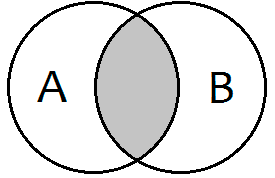

In [62]:
Image(filename="/content/python-ml-course/notebooks/resources/inner-join.png")

In [63]:
# data_main contiene toda la info
# data_country_dlt le falta la info de 7 atletas
merged_inner = pd.merge(left = data_main, right = data_country_dlt,
                       how = "inner", left_on = "Athlete", right_on = "Athlete")

In [64]:
len(merged_inner)

8609

In [65]:
merged_inner.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


## Left Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendrán NAs en las columnas del data frame derecho.
* El número de filas será igual al número de filas del data frame izquierdo
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Left Join B tendrá 60 filas
* En términos de teoría de conjuntos, se trata del propio data set de la izquierda quien, además tiene la intersección en su interior.

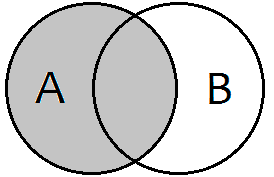

In [66]:
Image(filename="/content/python-ml-course/notebooks/resources/left-join.png")

In [67]:
merged_left = pd.merge(left = data_main, right = data_country_dlt, 
                      how = "left", left_on = "Athlete", right_on = "Athlete")
len(merged_left)

8618

In [68]:
merged_left.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


## Right Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame izquierdo, tendrán NAs en las columnas del data frame izquierdo.
* El número de filas será igual al número de filas del data frame derecho
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Right Join B tendrá 50 filas
* En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior.

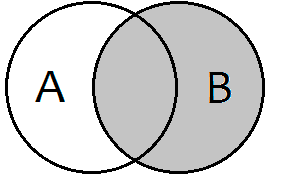

In [69]:
Image(filename="/content/python-ml-course/notebooks/resources/right-join.png")

In [70]:
merged_right = pd.merge(left = data_main_dlt, right = data_country_dp,
                       how = "right", left_on = "Athlete", right_on = "Athlete")
len(merged_right)

8616

In [71]:
merged_right.tail(10)

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8606,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8607,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8608,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8609,Michael Phelps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
8610,Mara Zini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
8611,Ju Min-Jin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea
8612,Valter Molea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italy
8613,Pavel Datsyuk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia
8614,Li Shanshan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China
8615,Luis Borroto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cuba


## Outer Join
* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica..
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquierdo).
* El número de filas será igual al máximo número de filas de ambos data frames
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
* En términos de teoría de conjuntos, se trata de la unión de conjuntos.

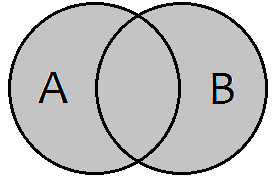

In [72]:
Image(filename="/content/python-ml-course/notebooks/resources/outer-join.png")

In [73]:
data_country_jb = data_country_dlt.append(
    {
        "Athlete": "Juan Gabriel Gomila",
        "Country": "España"
    },ignore_index = True
)

In [74]:
merged_outer = pd.merge(left = data_main, right=data_country_jb,
                       how = "outer", left_on = "Athlete", right_on="Athlete")
len(merged_outer)

8619

In [75]:
merged_outer.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008.0,08/24/2008,8.0,0.0,0.0,8.0,NaN
1,Michael Phelps,19.0,2004.0,08/29/2004,6.0,0.0,2.0,8.0,NaN
2,Michael Phelps,27.0,2012.0,08/12/2012,4.0,2.0,0.0,6.0,NaN
3,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
4,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States


In [76]:
merged_outer.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8618,Juan Gabriel Gomila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,España


In [77]:
len(data_main)

8618

In [78]:
len(data_main_dlt)

8609

In [79]:
len(data_country_dp)

6956

In [80]:
len(data_country_dlt)

6949

In [81]:
len(merged_inner)

8609

In [82]:
len(merged_left)

8618

In [83]:
len(merged_right)

8616

In [84]:
len(merged_outer)

8619